<a href="https://colab.research.google.com/github/Riddhi0102/Employee-Salary-Prediction-Riddhi-Sharma/blob/main/employee_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Salary Prediction - Final Project

This notebook contains the full workflow for predicting employee salaries using machine learning algorithms.

In [1]:
# 📦 Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# 📂 Loading the dataset
df = pd.read_csv("employee_salary_data.csv")
df.head()

,Experience_Years,Education_Level,Job_Role,Salary
0,1,Bachelors,Software Engineer,400000
1,3,Masters,Data Scientist,750000
2,5,PhD,ML Engineer,1200000
3,2,Bachelors,Software Engineer,500000
4,7,Masters,Data Analyst,700000


## 🔍 Step 1: Exploratory Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Experience_Years  10 non-null     int64 
 1   Education_Level   10 non-null     object
 2   Job_Role          10 non-null     object
 3   Salary            10 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 452.0+ bytes


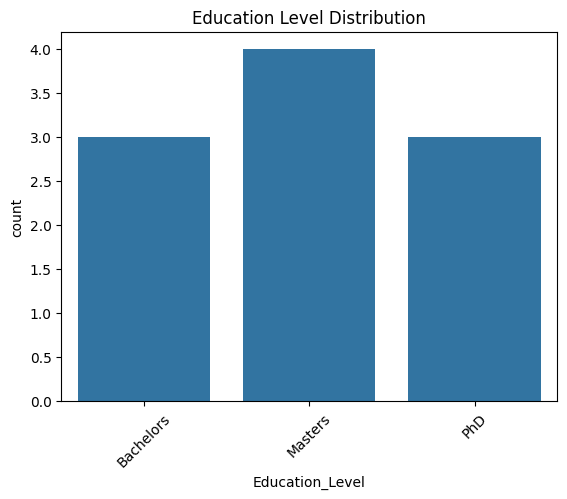

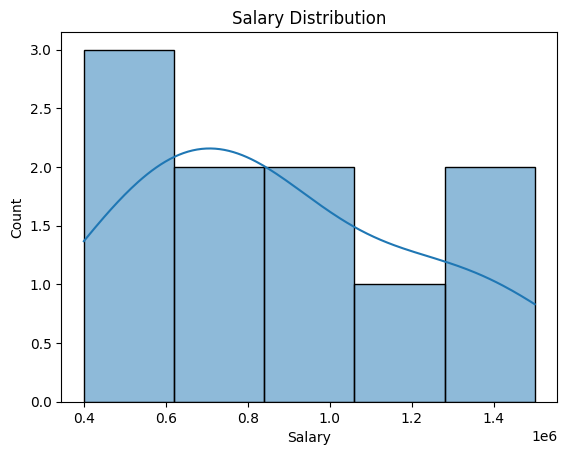

In [5]:
df.info()
df.describe()
df.isnull().sum()

# Visualizing categorical features
sns.countplot(data=df, x='Education_Level')
plt.xticks(rotation=45)
plt.title("Education Level Distribution")
plt.show()

# Salary distribution
sns.histplot(df['Salary'], kde=True)
plt.title("Salary Distribution")
plt.show()

## 🧹 Step 2: Data Preprocessing

In [7]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Education_Level', 'Job_Role']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature and target selection
X = df.drop('Salary', axis=1)
y = df['Salary']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🤖 Step 3: Model Training and Evaluation

In [8]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Evaluation Function
def evaluate(model_name, y_true, y_pred):
    print(f"{model_name} - R² Score: {r2_score(y_true, y_pred):.2f}, MSE: {mean_squared_error(y_true, y_pred):.2f}")

evaluate("Linear Regression", y_test, lr_preds)
evaluate("Decision Tree", y_test, dt_preds)
evaluate("Random Forest", y_test, rf_preds)

Linear Regression - R² Score: 0.98, MSE: 1230693230.63
Decision Tree - R² Score: 0.72, MSE: 21250000000.00
Random Forest - R² Score: 0.97, MSE: 2434500000.00


## 📈 Step 4: Final Model & User Input Prediction

In [12]:
# Let's use Random Forest (highest accuracy)
final_model = rf

# Sample user input
sample_data = {
    'Education_Level': label_encoders['Education_Level'].transform(['Masters'])[0],
    'Job_Role': label_encoders['Job_Role'].transform(['Data Scientist'])[0],
    'Experience_Years': 3
}
# Ensure the input DataFrame has the same column order and names
sample_df = pd.DataFrame([sample_data], columns=X.columns)

# Scale input features using the same scaler
sample_df_scaled = scaler.transform(sample_df)

# Predict
predicted_salary = final_model.predict(sample_df_scaled)[0]
print(f"Predicted Salary: ₹{predicted_salary:.2f}")

Predicted Salary: ₹497500.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
